# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


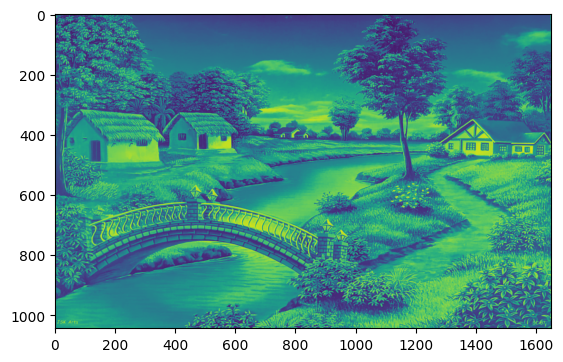

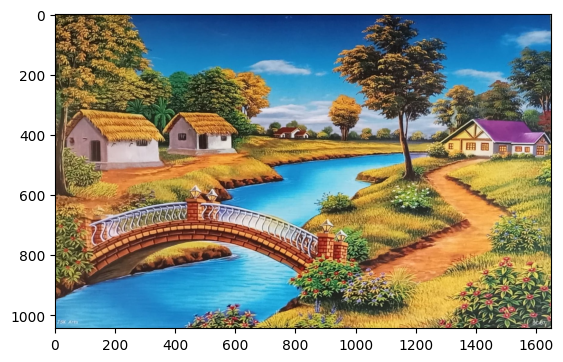

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr = cv2.imread("plain-poster-scenery.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()
plt.imshow(img_rgb)
plt.show()

In [2]:
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=int)# hist initially stores all 0s in 256 places

    # here hist gets the pixel value(intensity) and iterates over all pixels,
    # increasing the value for a certain intensity value on each iteration
    for i in range(gray_img.shape[0]):
        for j in range(gray_img.shape[1]):
            hist[ gray_img[i, j] ] += 1

    # plot using matplotlib
    plt.bar(np.arange(256), hist, width=1.0, color='cyan')
    plt.title("Grayscale Histogram")
    plt.show()

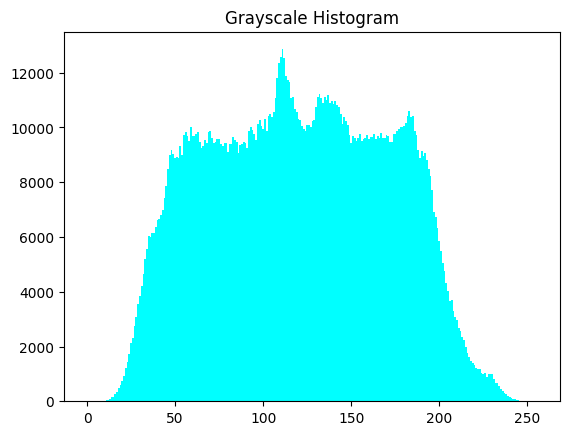

In [3]:
gray_histogram(gray)

In [4]:
def rgb_histogram(img_rgb):
    # Three histograms of length 256
    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    # Loop through the image
    rows, cols, _ = img_rgb.shape
    for i in range(rows):
        for j in range(cols):
            r, g, b = img_rgb[i, j]   # unpack the pixel

            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b



In [5]:
def plot_rgb_hist(hist_r, hist_g, hist_b):
    plt.figure(figsize=(8,4))
    plt.plot(hist_r, color='r', label='Red Channel')
    plt.plot(hist_g, color='g', label='Green Channel')
    plt.plot(hist_b, color='b', label='Blue Channel')

    plt.title("RGB Histogram")
    plt.xlabel("Intensity (0-255)")
    plt.ylabel("Pixel Count")
    plt.xlim(0,255)
    plt.legend()
    plt.show()


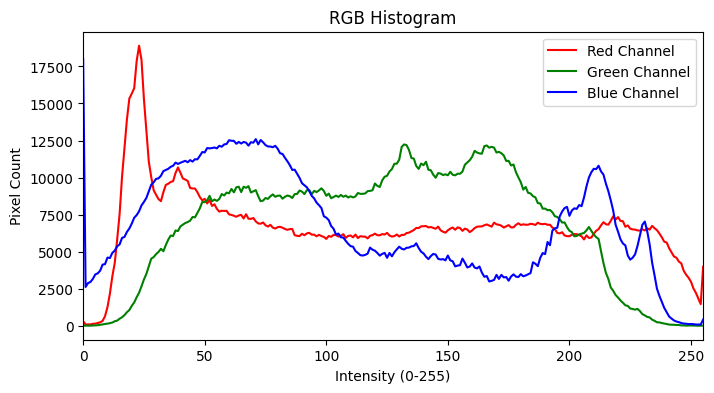

In [6]:
# img_rgb
hist_r, hist_g, hist_b = rgb_histogram(img_rgb)
plot_rgb_hist(hist_r, hist_g, hist_b)


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [7]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

import numpy as np

def rgb_to_hsv_numpy(img_rgb):
    # Convert to float32 for accurate division
    img = img_rgb.astype(np.float32)

    # Split channels
    R = img[:, :, 0] / 255.0
    G = img[:, :, 1] / 255.0
    B = img[:, :, 2] / 255.0

    # Compute max, min, delta
    Cmax = np.maximum(np.maximum(R, G), B)
    Cmin = np.minimum(np.minimum(R, G), B)
    delta = Cmax - Cmin

    # Initialize HSV channels
    H = np.zeros_like(Cmax)
    S = np.zeros_like(Cmax)
    V = Cmax.copy()

    # ---- HUE CALCULATION ----

    # Avoid division by zero later
    mask = delta != 0

    # Case 1: Red is max
    idx = (Cmax == R) & mask
    H[idx] = (60 * ((G[idx] - B[idx]) / delta[idx]) + 360) % 360

    # Case 2: Green is max
    idx = (Cmax == G) & mask
    H[idx] = (60 * ((B[idx] - R[idx]) / delta[idx]) + 120)

    # Case 3: Blue is max
    idx = (Cmax == B) & mask
    H[idx] = (60 * ((R[idx] - G[idx]) / delta[idx]) + 240)

    # Convert Hue to OpenCV scale (0–179)
    H = (H / 2).astype(np.uint8)

    # ---- SATURATION ----
    S[Cmax != 0] = (delta[Cmax != 0] / Cmax[Cmax != 0])
    S = (S * 255).astype(np.uint8)

    # ---- VALUE ----
    V = (V * 255).astype(np.uint8)

    # Merge into HSV image
    hsv = np.stack([H, S, V], axis=-1)
    return hsv


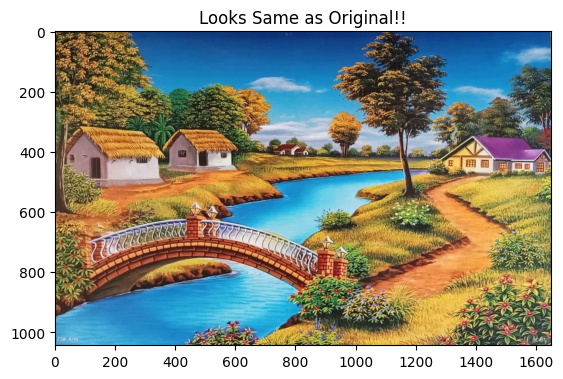

In [8]:
hsv_custom = rgb_to_hsv_numpy(img_rgb)

# Converting back using OpenCV
rgb_reconstructed = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

plt.imshow(rgb_reconstructed)
plt.title("Looks Same as Original!!")
plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [19]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

def divine_shine(img_rgb):

  # making picture brighter
  beta = 20
  bright = cv2.convertScaleAbs(img_rgb, alpha=1.0,beta = beta)

  # increasing contrast
  alpha = 1.25
  contrast = cv2.convertScaleAbs(bright, alpha=alpha, beta=0)

  # boosting saturation by 30%
  hsv = cv2.cvtColor(contrast, cv2.COLOR_RGB2HSV).astype(np.float32)
  hsv[...,1] = np.clip(hsv[..., 1] * 1.30, 0, 255)
  out_rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

  return out_rgb

  # Good for: Underexposed / low-light landscapes brightens shadows
  # and reveals details (eg city at dusk, indoor window scenes).

In [15]:
def show_original_and_filtered(img_rgb, filtered_rgb):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(filtered_rgb)
    plt.axis("off")
    plt.show()

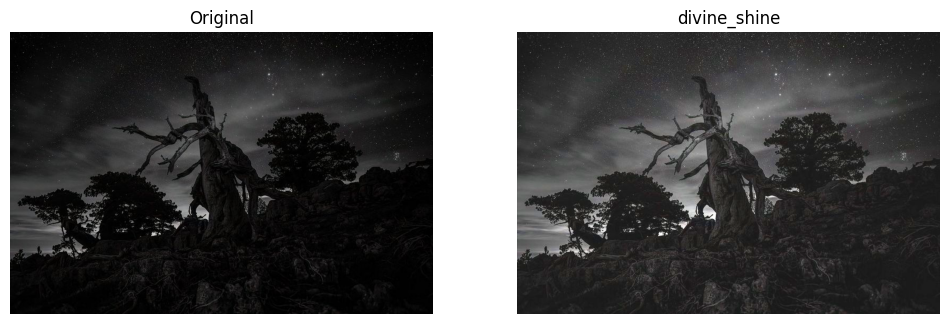

In [20]:
img_bgr = cv2.imread("tronto-low-light.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

filtered = divine_shine(img_rgb)
show_original_and_filtered(img_rgb, filtered, title_filtered="divine_shine")

# I used brightness, contrast, and saturation enhancement because
# the original image looked dull and underexposed, which reduced clarity and color depth.
# Increasing brightness and contrast helps reveal details in darker regions,
# while the saturation boost adds vibrancy to the natural colors.
# This combination works especially well for low-light landscapes or cloudy outdoor scenes that need more visual punch.

In [21]:
def gamma_lut_table(gamma):
    # Builds a 256-entry lookup table for gamma correction.
    inv = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv) * 255.0 for i in range(256)], dtype=np.uint8)
    return table

def vibrancemama(img_rgb):
    """
    VibranceMama filter:
    1) Warm tint by scaling channels (increase red, slightly reduce blue)
    2) Increase selective vibrance in HSV (protects already-saturated pixels)
    3) Apply a small gamma correction via LUT to smooth midtones
    Input: img_rgb uint8 RGB (0..255)
    Output: uint8 RGB (0..255)
    """
    # 1) Warm tint (channel scaling) - make image slightly warmer
    img = img_rgb.astype(np.float32)
    img[..., 0] = img[..., 0] * 1.08   # R channel up by 8%
    img[..., 2] = img[..., 2] * 0.95   # B channel down by 5%
    img = np.clip(img, 0, 255).astype(np.uint8)

    # 2) Vibrance: selective saturation increase in HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
    s = hsv[..., 1] / 255.0            # normalized saturation 0..1
    boost = 0.35                       # how strong the vibrance effect is
    delta = (1 - s) * boost            # bigger boost for low-s pixels
    s_new = s + s * delta              # new saturation
    hsv[..., 1] = np.clip(s_new * 255.0, 0, 255)

    vib_rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

    # 3) Gamma correction (gentle) using LUT (lecture-style)
    gamma = 1.08
    table = gamma_lut_table(gamma)
    final = cv2.LUT(vib_rgb, table)

    return final

"""The VibranceMama filter works best on images that contain warm tones,
people, or natural sunlight, such as portraits, golden-hour photos, sunsets,
and outdoor scenes with warm lighting. The warm tint improves skin tones,
the vibrance boost enhances muted colors without oversaturating already-bright areas,
and the gentle gamma correction adds a soft glowing effect. Overall,
it is ideal for images that need a warm, pleasing, and naturally enhanced look.
"""

'The VibranceMama filter works best on images that contain warm tones, \npeople, or natural sunlight, such as portraits, golden-hour photos, sunsets, \nand outdoor scenes with warm lighting. The warm tint improves skin tones, \nthe vibrance boost enhances muted colors without oversaturating already-bright areas, \nand the gentle gamma correction adds a soft glowing effect. Overall, \nit is ideal for images that need a warm, pleasing, and naturally enhanced look.\n'

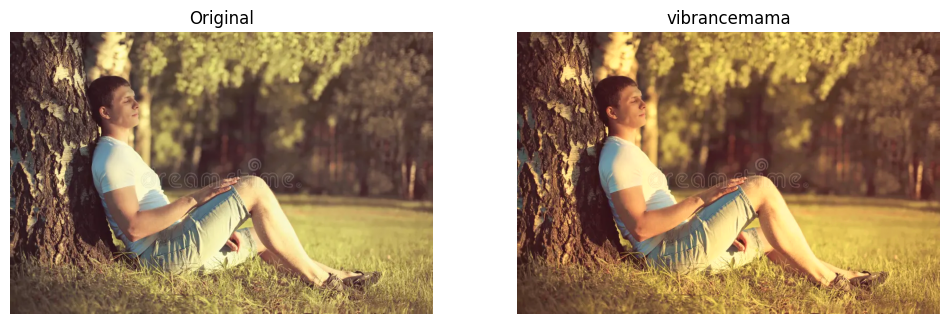

In [24]:
img_bgr = cv2.imread("img_vibrance.webp")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

filtered = vibrancemama(img_rgb)
show_original_and_filtered(img_rgb, filtered, title_filtered="vibrancemama")

# I used a warm tint, vibrance boost, and light gamma correction to enhance muted colors
# and add a soft glow. These adjustments make the image feel warmer and more natural,
# which works especially well for this image.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [27]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

def white_patch_balance(img_rgb):

    img = img_rgb.astype(np.float32)

    # 1) Find the maximum value in each channel
    max_per_channel = np.max(np.max(img, axis=0), axis=0)

    # 2) Compute scale factors so that each channel's max becomes 255
    scale = np.ones(3, dtype=np.float32)
    for c in range(3):
        m = max_per_channel[c]
        if m > 0:
            scale[c] = 255.0 / m
        else:
            scale[c] = 1.0

    # 3) Apply per-channel scaling (channel-wise multiplication)
    out = img * scale.reshape((1, 1, 3))

    # 4) Clip to valid range and convert to uint8
    out = np.clip(out, 0, 255).astype(np.uint8)

    return out

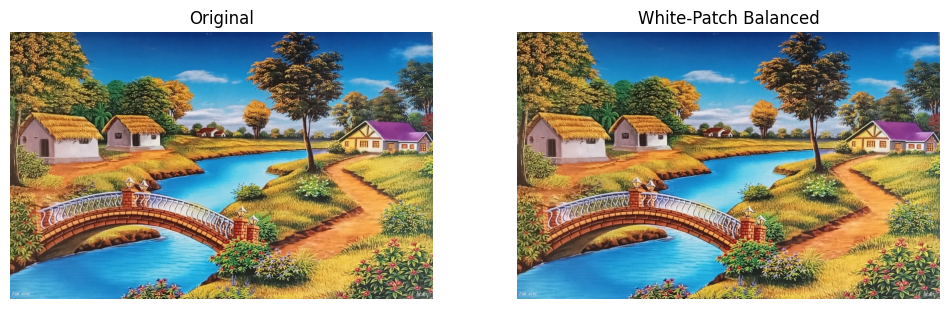

In [28]:
img_bgr = cv2.imread("plain-poster-scenery.jpg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

wb = white_patch_balance(img_rgb)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wb)
plt.title("White-Patch Balanced")
plt.axis("off")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [30]:
def white_balance(img_rgb, value):
    """
    White Balance Slider
    value = 0   -> coldest
    value = 0.5 -> original
    value = 1   -> warmest
    """
    img = img_rgb.astype(np.float32)

    # ----- 1) Create colder version (boost blue, reduce red) -----
    cold = img.copy()
    cold[..., 2] *= 1.20   # Blue channel boost
    cold[..., 0] *= 0.90   # Red channel slight reduction
    cold = np.clip(cold, 0, 255)

    # ----- 2) Create warmer version (boost red, reduce blue) -----
    warm = img.copy()
    warm[..., 0] *= 1.20   # Red channel boost
    warm[..., 2] *= 0.90   # Blue channel reduction
    warm = np.clip(warm, 0, 255)

    # ----- 3) Interpolate between cold → original → warm -----
    # value in [0,1], but original is at 0.5
    if value < 0.5:
        t = value / 0.5                      # scale 0→0.5 into 0→1
        out = (1 - t) * cold + t * img       # interpolate cold → original
    else:
        t = (value - 0.5) / 0.5              # scale 0.5→1 into 0→1
        out = (1 - t) * img + t * warm       # interpolate original → warm

    return np.clip(out, 0, 255).astype(np.uint8)


def show_before_after(original, result, title="White Balance Result"):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(result)
    plt.title(title)
    plt.axis("off")
    plt.show()


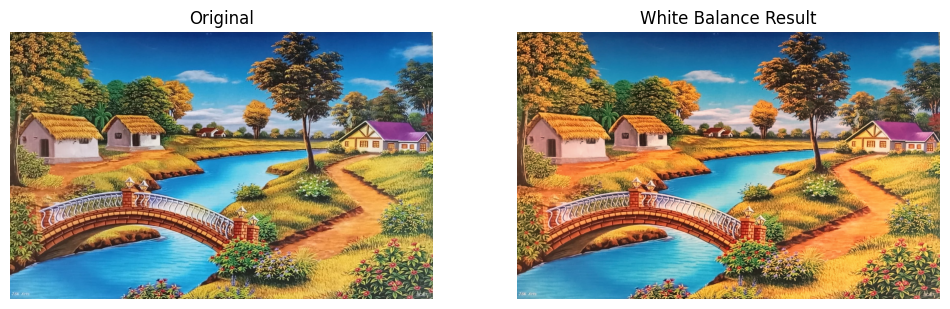

In [36]:
bgr = cv2.imread("plain-poster-scenery.jpg")
img_rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

wb_img = white_balance(img_rgb, value=0.9)  # pick slider value here
show_before_after(img_rgb, wb_img)